In [92]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv('../data/ground/vor/vor_vs_biomass no_oppo_ss_2008_2023.csv')

In [4]:
df

,Year,Site,Low,High,Total kg/ha,Low_sqrt,High_sqrt
0,2008,15E,1.8,9.0,485.000000,1.341641,3.000000
1,2008,15SW,2.7,9.5,694.000000,1.643168,3.082207
2,2008,21N,3.7,14.9,1009.000000,1.923538,3.860052
3,2008,23E,1.9,8.5,473.000000,1.378405,2.915476
4,2008,23W,4.4,17.3,691.000000,2.097618,4.159327
...,...,...,...,...,...,...,...
72,2023,15E,8.5,48.1,2192.266667,2.915476,6.935416
73,2023,23E,4.3,38.6,1653.041667,2.073644,6.212890
74,2023,23W,11.6,67.6,3671.408333,3.405877,8.221922
75,2023,GS,13.9,60.6,1966.633333,3.728270,7.784600


In [5]:
df = df.rename(columns={'Total kg/ha': 'kg'})
df['Low_sqrt'] = np.sqrt(df['Low'])
df['High_sqrt'] = np.sqrt(df['High'])
df['kg_sqrt'] = np.sqrt(df['kg'])

In [6]:
df['Year'] = df['Year'].astype('str')

In [98]:
mod_all_lh = smf.ols('kg ~ Low + High', data=df).fit()
mod_all_lh_sqrt = smf.ols('np.sqrt(kg) ~ np.sqrt(Low) + np.sqrt(High)', data=df).fit()
mod_all_lxh_sqrt = smf.ols('np.sqrt(kg) ~ np.sqrt(Low) * np.sqrt(High)', data=df).fit()

In [45]:
mod_all_lh.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     kg   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     157.8
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           2.03e-27
Time:                        14:23:19   Log-Likelihood:                -548.89
No. Observations:                  77   AIC:                             1104.
Df Residuals:                      74   BIC:                             1111.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.1363     63.015      1.018      0.312     -61.423     189.696
Low          131.6637     25.664      5.130      0.000      80.528     182.800
High          20.0544      5.210      3.849      0.000       9.674      30.435
==============================================================================
Omnibus:                       11.392   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               33.604
Skew:                          -0.109   Prob(JB):                     5.05e-08
Kurtosis:                       6.229   Cond. No.                         44.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

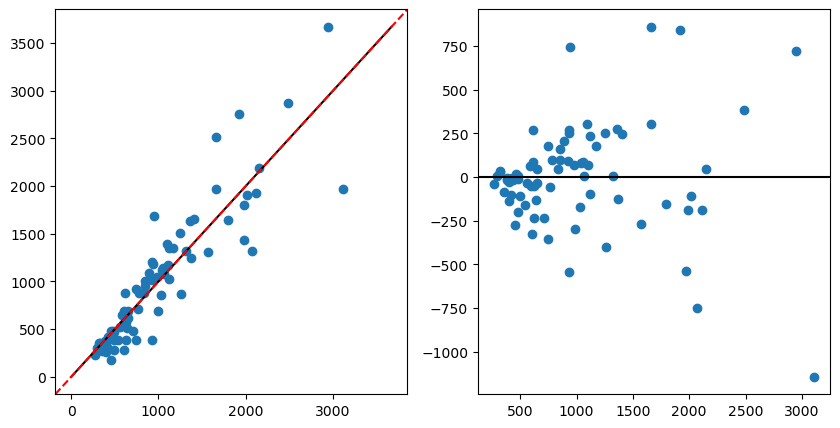

In [81]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].scatter(mod_all_lh.predict(), df['kg'])
axs[0].plot(np.arange(0, max(mod_all_lh.predict().max(), df['kg'].max())),
            np.arange(0, max(mod_all_lh.predict().max(), df['kg'].max())), c='black')
poly_mod = sm.OLS(df['kg'], sm.add_constant(mod_all_lh.predict())).fit()
# extract intercept b and slope m
b, m = poly_mod.params
# plot y = m*x + b
axs[0].axline(xy1=(0, b), slope=m, linestyle='--', color='r')

axs[1].scatter(mod_all_lh.predict(), mod_all_lh.resid)
axs[1].axhline(y=0, color='k')

In [82]:
mod_all_lh_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.sqrt(kg)   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     205.0
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           6.65e-31
Time:                        14:39:09   Log-Likelihood:                -216.60
No. Observations:                  77   AIC:                             439.2
Df Residuals:                      74   BIC:                             446.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8978      1.504      0.597      0.552      -2.099       3.895
np.sqrt(Low)     10.5488      1.569      6.721      0.000       7.422      13.676
np.sqrt(High)     2.0853      0.696      2.996      0.004       0.698       3.472
==============================================================================
Omnibus:                        5.886   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                5.682
Skew:                          -0.435   Prob(JB):                       0.0584
Kurtosis:                       4.006   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

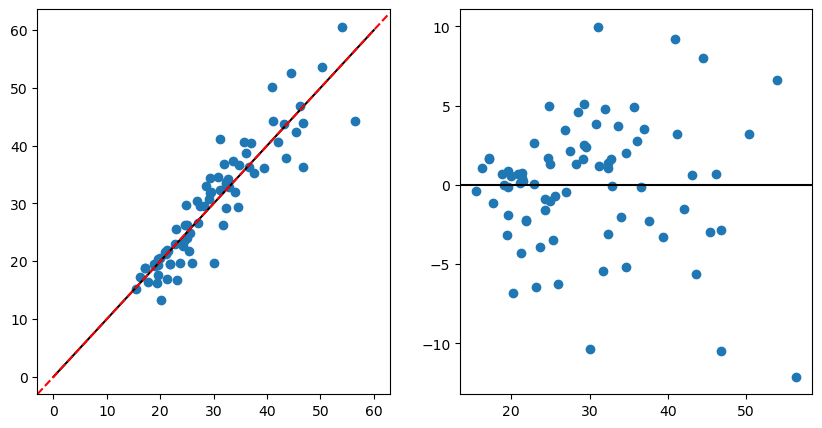

In [84]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].scatter(mod_all_lh_sqrt.predict(), np.sqrt(df['kg']))
axs[0].plot(np.arange(0, max(mod_all_lh_sqrt.predict().max(), np.sqrt(df['kg']).max())),
            np.arange(0, max(mod_all_lh_sqrt.predict().max(), np.sqrt(df['kg']).max())), c='black')
poly_mod = sm.OLS(np.sqrt(df['kg']), sm.add_constant(mod_all_lh_sqrt.predict())).fit()
# extract intercept b and slope m
b, m = poly_mod.params
# plot y = m*x + b
axs[0].axline(xy1=(0, b), slope=m, linestyle='--', color='r')

axs[1].scatter(mod_all_lh_sqrt.predict(), mod_all_lh_sqrt.resid)
axs[1].axhline(y=0, color='k')

In [99]:
mod_all_lxh_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.sqrt(kg)   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     138.7
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           4.48e-30
Time:                        10:31:31   Log-Likelihood:                -215.67
No. Observations:                  77   AIC:                             439.3
Df Residuals:                      73   BIC:                             448.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -4.5636      4.351     -1.049      0.298     -13.235       4.108
np.sqrt(Low)                  13.5768      2.751      4.935      0.000       8.094      19.060
np.sqrt(High)                  3.2817      1.132      2.900      0.005       1.027       5.537
np.sqrt(Low):np.sqrt(High)    -0.6051      0.453     -1.337      0.185      -1.507       0.297
==============================================================================
Omnibus:                        4.039   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                3.419
Skew:                          -0.342   Prob(JB):                        0.181
Kurtosis:                       3.772   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
with open('../models/biomass/CPER_VOR_to_biomass_model_20240325.pk', 'wb') as f:
    pickle.dump(mod_all_lh_sqrt, f)

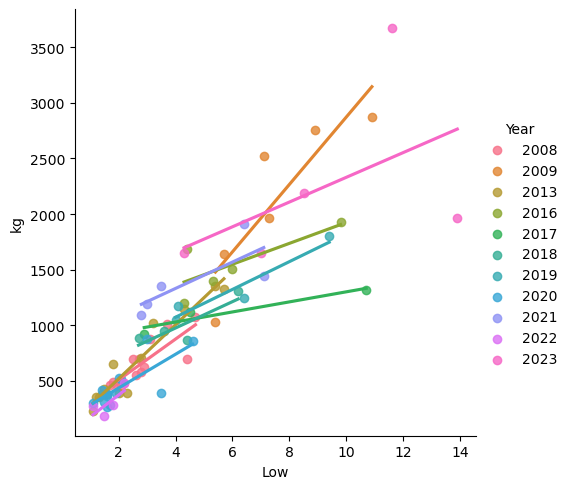

In [19]:
sns.lmplot(x='Low', y='kg', data=df, hue='Year', ci=None)

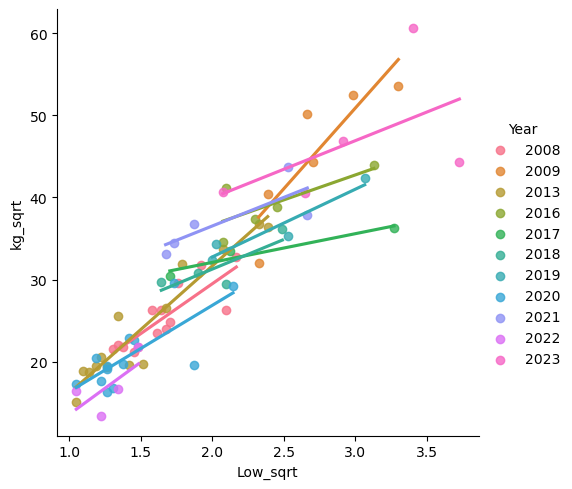

In [20]:
sns.lmplot(x='Low_sqrt', y='kg_sqrt', data=df, hue='Year', ci=None)

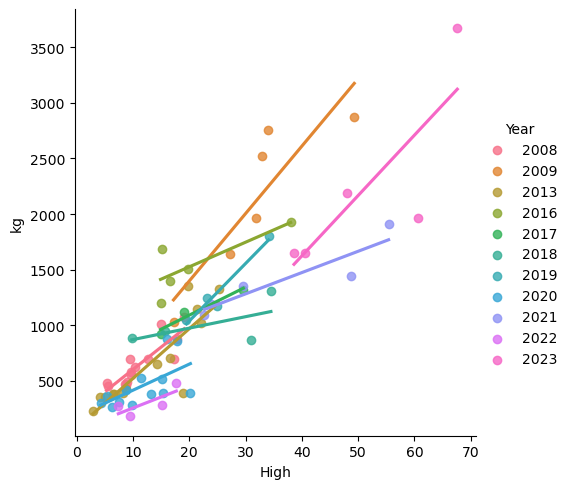

In [21]:
sns.lmplot(x='High', y='kg', data=df, hue='Year', ci=None)

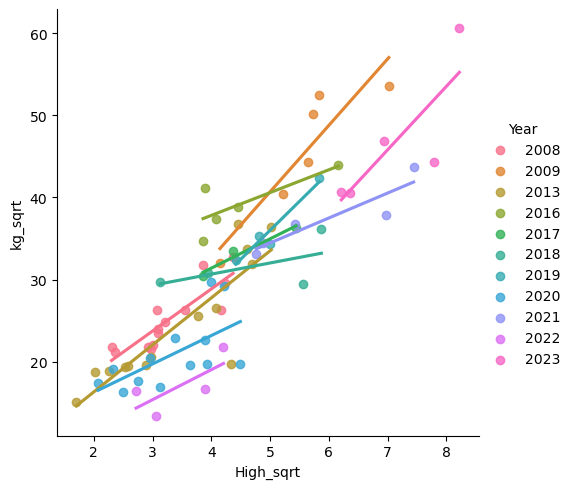

In [22]:
sns.lmplot(x='High_sqrt', y='kg_sqrt', data=df, hue='Year', ci=None)

In [11]:
df_ltgi = df[df['Site'].isin(['15E', '23E', '23W', 'GS', 'HEX'])]

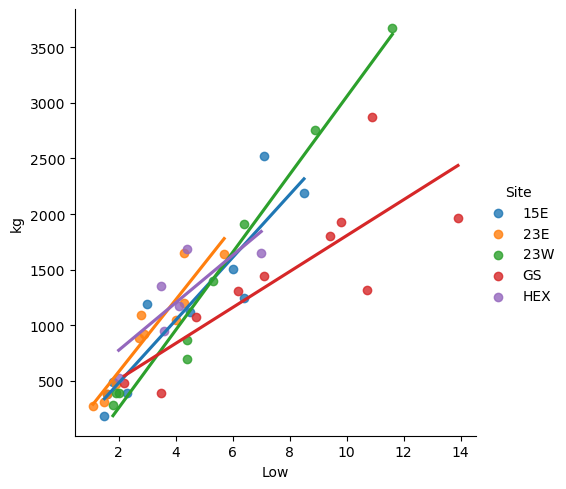

In [36]:
sns.lmplot(x='Low', y='kg', data=df_ltgi, hue='Site', ci=None)

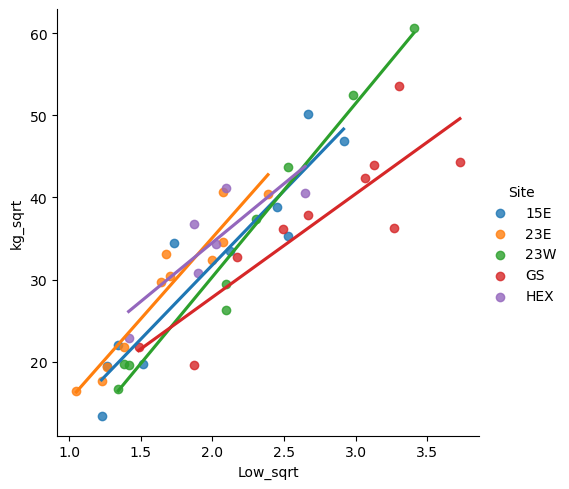

In [37]:
sns.lmplot(x='Low_sqrt', y='kg_sqrt', data=df_ltgi, hue='Site', ci=None)

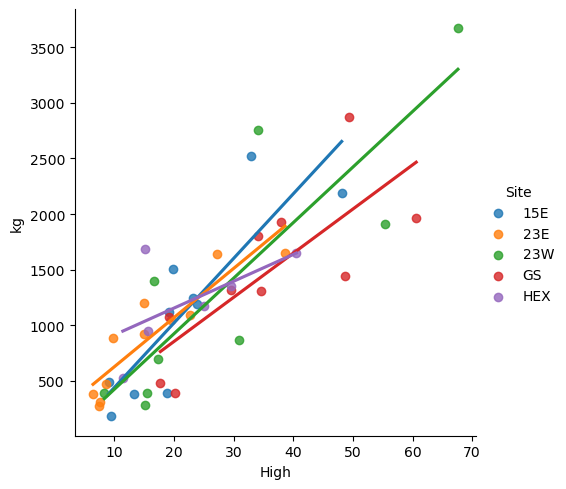

In [14]:
sns.lmplot(x='High', y='kg', data=df_ltgi, hue='Site', ci=None)

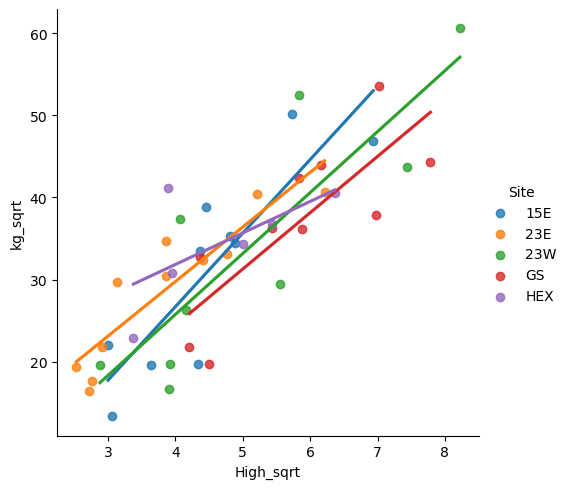

In [15]:
sns.lmplot(x='High_sqrt', y='kg_sqrt', data=df_ltgi, hue='Site', ci=None)

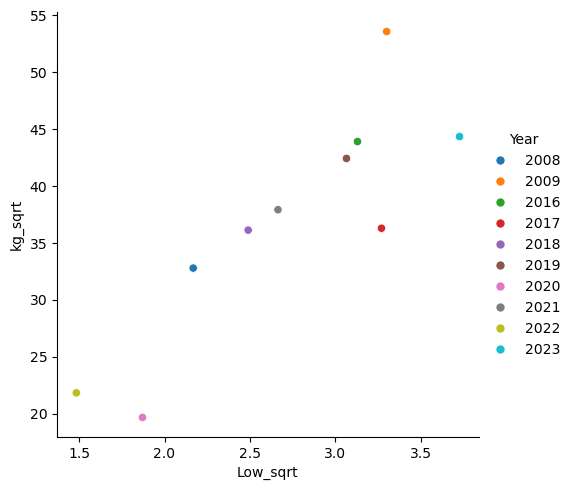

In [16]:
sns.relplot(x='Low_sqrt', y='kg_sqrt', data=df[df['Site'] == 'GS'], hue='Year')

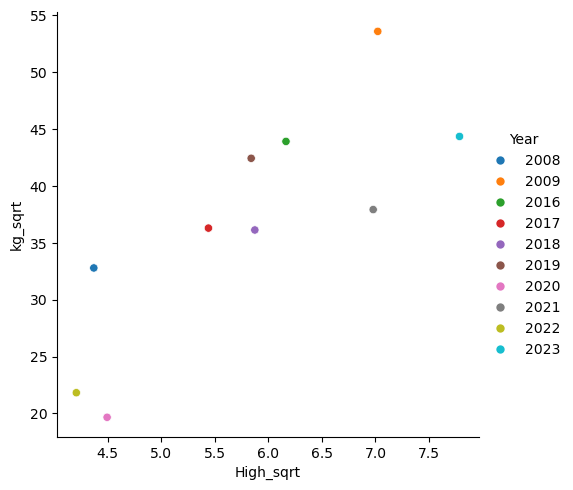

In [17]:
sns.relplot(x='High_sqrt', y='kg_sqrt', data=df[df['Site'] == 'GS'], hue='Year')

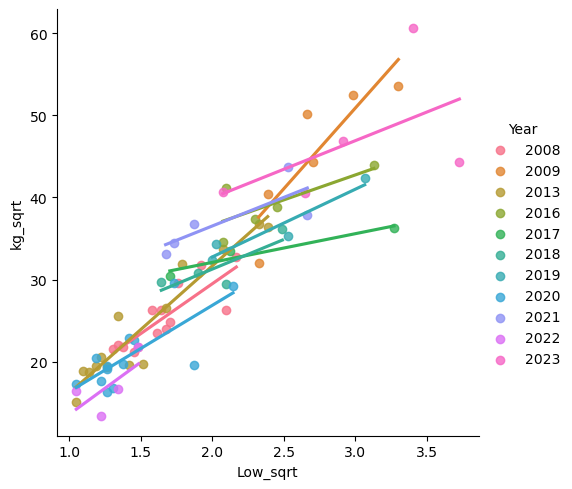

In [25]:
sns.lmplot(x='Low_sqrt', y='kg_sqrt', data=df, hue='Year', ci=None)

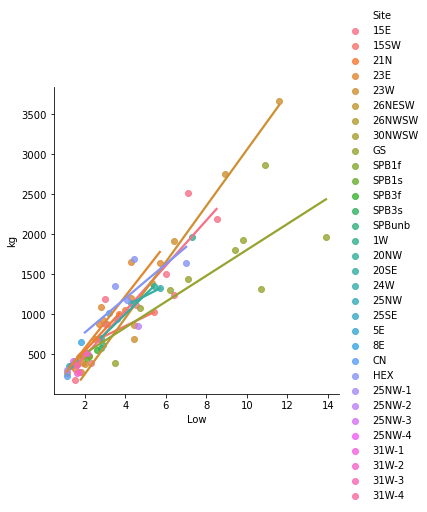

In [73]:
sns.lmplot(x='Low_sqrt', y='kg_sqrt', data=df, hue='Site', ci=None)

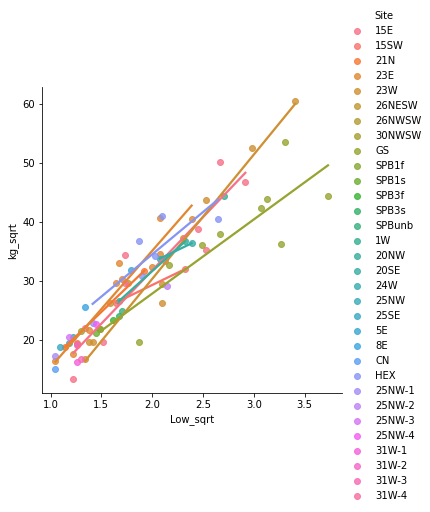

In [72]:
sns.lmplot(x='Low_sqrt', y='kg_sqrt', data=df, hue='Site', ci=None)

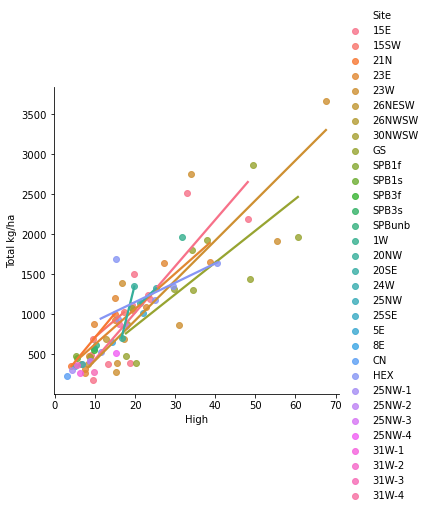

In [24]:
sns.lmplot(x='High', y='kg', data=df, hue='Site', ci=None)

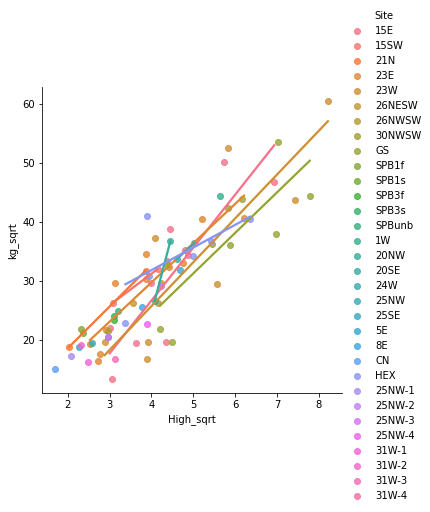

In [74]:
sns.lmplot(x='High_sqrt', y='kg_sqrt', data=df, hue='Site', ci=None)

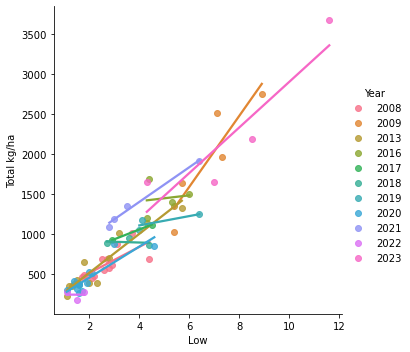

In [23]:
sns.lmplot(x='Low', y='kg', data=df[df['Site'] != 'GS'], hue='Year', ci=None)

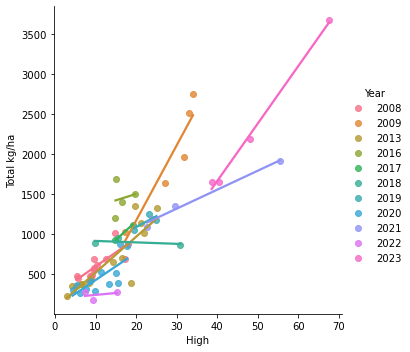

In [25]:
sns.lmplot(x='High', y='kg', data=df[df['Site'] != 'GS'], hue='Year', ci=None)

In [42]:
mod_ltgi = smf.ols('np.sqrt(kg) ~ np.sqrt(Low) + np.sqrt(High) + Site', df_ltgi).fit()

In [43]:
mod_ltgi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.sqrt(kg)   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     41.54
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           6.89e-16
Time:                        13:43:50   Log-Likelihood:                -126.31
No. Observations:                  46   AIC:                             268.6
Df Residuals:                      38   BIC:                             283.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -14.0767      7.102     -1.982      0.055     -28.454       0.300
Site[T.23E]                    3.0976      1.854      1.671      0.103      -0.656       6.851
Site[T.23W]                   -1.0394      1.933     -0.538      0.594      -4.953       2.874
Site[T.GS]                    -6.9410      2.025     -3.427      0.001     -11.041      -2.841
Site[T.HEX]                    2.2160      2.155      1.028      0.310      -2.146       6.578
np.sqrt(Low)                  17.9492      3.628      4.947      0.000      10.604      25.294
np.sqrt(High)                  4.0628      1.649      2.464      0.018       0.724       7.401
np.sqrt(Low):np.sqrt(High)    -0.8816      0.622     -1.417      0.165      -2.141       0.378
==============================================================================
Omnibus:                        0.249   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.883   Jarque-Bera (JB):                0.444
Skew:                          -0.018   Prob(JB):                        0.801
Kurtosis:                       2.520   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
mod_all_l = smf.ols('kg ~ Low', data=df).fit()
mod_all_lh = smf.ols('kg ~ Low + High', data=df).fit()
mod_all_l_sqrt = smf.ols('np.sqrt(kg) ~ np.sqrt(Low)', data=df).fit()
mod_all_lh_sqrt = smf.ols('np.sqrt(kg) ~ np.sqrt(Low) + np.sqrt(High)', data=df).fit()
mod_all_lxh_sqrt = smf.ols('np.sqrt(kg) ~ np.sqrt(Low) * np.sqrt(High)', data=df).fit()

In [31]:
mod_all_lh.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     kg   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     157.8
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           2.03e-27
Time:                        13:32:58   Log-Likelihood:                -548.89
No. Observations:                  77   AIC:                             1104.
Df Residuals:                      74   BIC:                             1111.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.1363     63.015      1.018      0.312     -61.423     189.696
Low          131.6637     25.664      5.130      0.000      80.528     182.800
High          20.0544      5.210      3.849      0.000       9.674      30.435
==============================================================================
Omnibus:                       11.392   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               33.604
Skew:                          -0.109   Prob(JB):                     5.05e-08
Kurtosis:                       6.229   Cond. No.                         44.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
mod_all_lh_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.sqrt(kg)   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     205.0
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           6.65e-31
Time:                        13:32:36   Log-Likelihood:                -216.60
No. Observations:                  77   AIC:                             439.2
Df Residuals:                      74   BIC:                             446.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8978      1.504      0.597      0.552      -2.099       3.895
np.sqrt(Low)     10.5488      1.569      6.721      0.000       7.422      13.676
np.sqrt(High)     2.0853      0.696      2.996      0.004       0.698       3.472
==============================================================================
Omnibus:                        5.886   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                5.682
Skew:                          -0.435   Prob(JB):                       0.0584
Kurtosis:                       4.006   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
mod_sub_l_sqrt = smf.ols('np.sqrt(kg) ~ np.sqrt(Low)', data=df[df['Site'] != 'GS']).fit()
mod_sub_lh_sqrt = smf.ols('np.sqrt(kg) ~ np.sqrt(Low) + np.sqrt(High)', data=df[df['Site'] != 'GS']).fit()
mod_sub_lxh_sqrt = smf.ols('np.sqrt(kg) ~ np.sqrt(Low) * np.sqrt(High)', data=df[df['Site'] != 'GS']).fit()

In [30]:
mod_sub_l_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.sqrt(kg)   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     533.8
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           4.75e-33
Time:                        13:32:43   Log-Likelihood:                -174.70
No. Observations:                  67   AIC:                             353.4
Df Residuals:                      65   BIC:                             357.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.5971      1.416     -1.834      0.071      -5.425       0.230
np.sqrt(Low)    17.5551      0.760     23.103      0.000      16.038      19.073
==============================================================================
Omnibus:                        0.180   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.914   Jarque-Bera (JB):                0.025
Skew:                           0.047   Prob(JB):                        0.988
Kurtosis:                       3.007   Cond. No.                         8.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
mod_sub_lh_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.sqrt(kg)   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     299.7
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           3.15e-33
Time:                        16:18:23   Log-Likelihood:                -170.74
No. Observations:                  67   AIC:                             347.5
Df Residuals:                      64   BIC:                             354.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.8699      1.348     -2.128      0.037      -5.564      -0.176
np.sqrt(Low)     13.9844      1.452      9.628      0.000      11.083      16.886
np.sqrt(High)     1.6713      0.590      2.833      0.006       0.493       2.850
==============================================================================
Omnibus:                        0.759   Durbin-Watson:                   2.237
Prob(Omnibus):                  0.684   Jarque-Bera (JB):                0.424
Skew:                          -0.190   Prob(JB):                        0.809
Kurtosis:                       3.089   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""